# Data Science Masters :Assignment 30


# Problem:
Using PCA (Principal Component Analysis) , to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and color each data point with specific class

# Solution: 

Importing Libraries...

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

# modules for Machine Learning
from sklearn.decomposition  import PCA  as sklearnPCA 
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score , confusion_matrix 

In [2]:
# Load Dataset
iris_dataset = datasets.load_iris()

In [5]:
# Description of Dataset
iris_dataset.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [6]:
# Iris feature names
iris_features = iris_dataset.feature_names
iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# Target Variable
iris_target= iris_dataset.target
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Feature data  from Iris dataset
iris_data= iris_dataset.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
# Creating DataFrame
df_IrisData = pd.DataFrame(data= iris_data , columns= iris_features)
df_IrisData['target'] = iris_target
df_IrisData.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


### Exploratory data analysis

In [12]:
# Check whether data set conins null /NA
df_IrisData.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [14]:
# Statistical analysis
df_IrisData.iloc[:,0:4].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# Unique data
df_IrisData['target'].unique()

array([0, 1, 2], dtype=int64)

### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188B3410F60>,
      dtype=object)

<Figure size 1080x720 with 0 Axes>

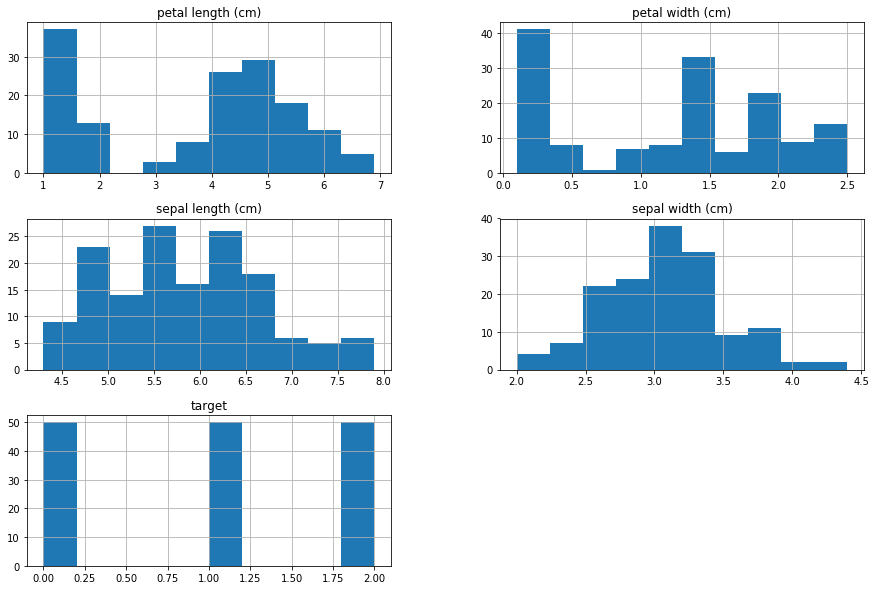

In [16]:
# Distirbution of features of iris data
plt.figure(figsize=(15,10))
df_IrisData.hist(figsize=(15,10))

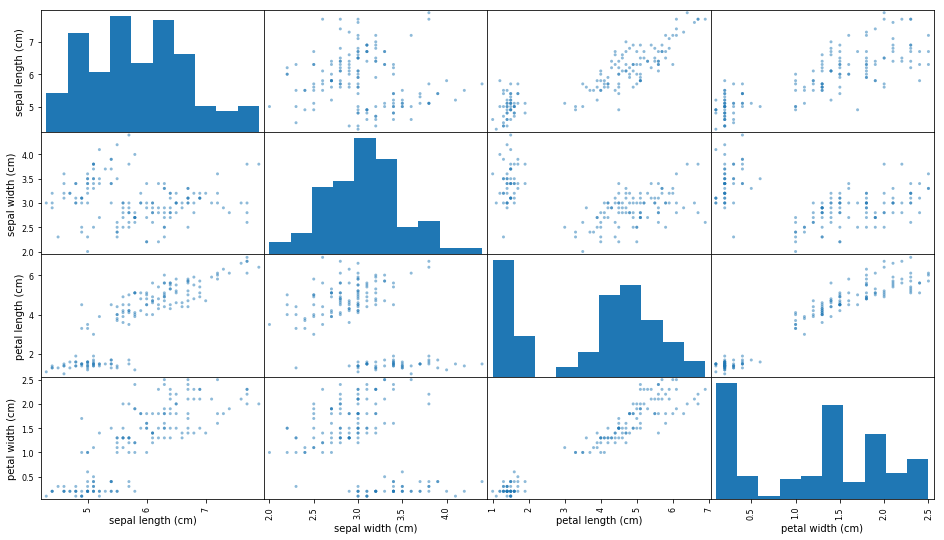

In [17]:
# Scatter plot between features

from pandas.plotting import scatter_matrix
scatter_matrix(frame=df_IrisData.iloc[:,0:4] , figsize=(16,9))
plt.show()

Text(0.5,1,'Correlation between different fearures')

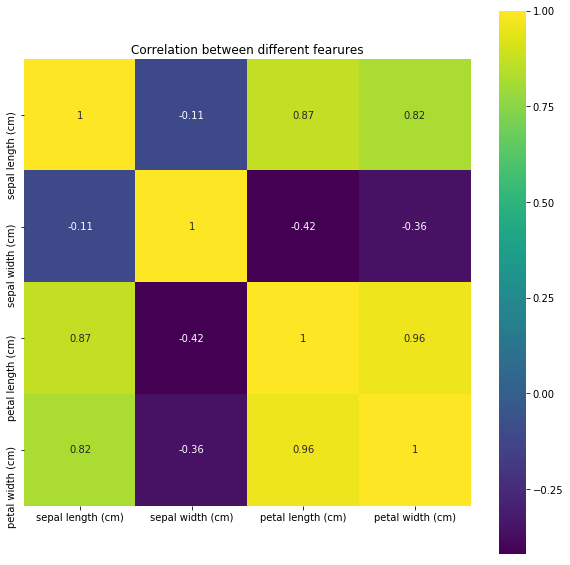

In [18]:
#Correlation map between features

correlation = df_IrisData.iloc[:,0:4].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

### Data Prepration 

In [19]:
# Selection of feature and target data 

df_Feature = df_IrisData.iloc[:,0:4]
df_target = df_IrisData.iloc[:,-1:]

In [20]:
# Standardizing the data
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(df_Feature)  
X_std[0:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

### Apply PCA Algorithm

In [23]:
# PCA algorithm from sklearn.decomposition
from sklearn.decomposition import PCA

sklearnPCA = PCA(n_components= 3)   # n_compenets : defines no. of principal components to be selected, for problem its given 3-dimension
Y_sklearn = sklearnPCA.fit_transform(X_std)  # Applying normalize data into PCA
Y_sklearn

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01],
       [-2.22408272e+00, -7.09118158e-01, -2.23214514e-01],
       [-2.63971626e+00, -9.38281982e-01,  1.89570030e-01],
       [-2.19229151e+00,  1.88997851e+00, -4.69480095e-01],
       [-2.25146521e+00,  2.72237108e+00,  3.26037967e-02],
       [-2.20275048e+00,  1.51375028e+00

In [24]:
# Trasaforming Principle compenents returned by PCA model with traget variable into dataframe
df_Compenets = pd.DataFrame(data = Y_sklearn, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
df_Compenets = pd.concat([df_Compenets,df_target[['target']]], axis=1)
df_Compenets.head()

,principal component 1,principal component 2,principal component 3,target
0,-2.264542,0.505704,-0.121943,0
1,-2.086426,-0.655405,-0.227251,0
2,-2.367950,-0.318477,0.051480,0
3,-2.304197,-0.575368,0.098860,0
4,-2.388777,0.674767,0.021428,0


In [25]:
print(f"components_ in the data transformed to 3D : \n{sklearnPCA.components_}\n")
print(f"explained_variance_ in the data transformed to 3D : \n{sklearnPCA.explained_variance_}\n")
print(f"score in the data transformed to 3D : \n{sklearnPCA.score(X_std)}")

components_ in the data transformed to 3D : 
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]]

explained_variance_ in the data transformed to 3D : 
[2.93035378 0.92740362 0.14834223]

score in the data transformed to 3D : 
-3.270481937196946


### 3-D Viasualisation of principal components

In [26]:
# Transforming iris data target variable classes into tuple

class_var = list(range(3)) # 3 classes 0,1,2
class_var_desc = list(iris_dataset.target_names)
class_variable = tuple(zip(class_var_desc,class_var))
print("iris data class :", class_variable)
list(class_variable)

iris data class : (('setosa', 0), ('versicolor', 1), ('virginica', 2))


[('setosa', 0), ('versicolor', 1), ('virginica', 2)]

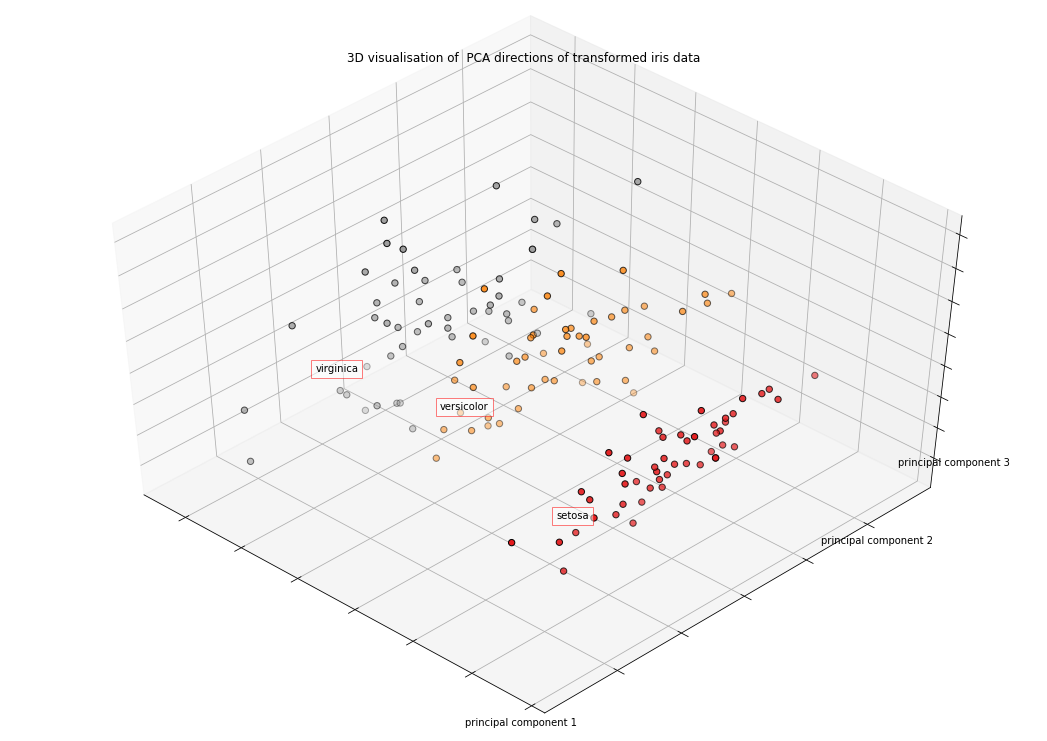

In [27]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D


figure = plt.figure(1, figsize=(15, 10))
plt.clf()
ax = Axes3D( fig= figure , rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

# Assigning lables to axis of graph
for name, label in list(class_variable):
    ax.text3D(
        Y_sklearn[iris_target == label, 0].mean(),
        Y_sklearn[iris_target == label, 1].mean() + 1.5,
        Y_sklearn[iris_target == label, 2].mean(), name,
        horizontalalignment='center',  verticalalignment='center',
        bbox=dict(alpha=.5, edgecolor='r', facecolor='w'))

# Setting up data points on graph
ax.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], Y_sklearn[:, 2], c=iris_target, cmap=plt.cm.Set1, edgecolor='k', s=40   )
ax.set_title("3D visualisation of  PCA directions of transformed iris data")
ax.w_xaxis.set_ticklabels(['principal component 1'])
ax.w_yaxis.set_ticklabels(['principal component 2'])
ax.w_zaxis.set_ticklabels(['principal component 3'])
plt.show()